In [ ]:
# !pip uninstall keras 
# !pip install keras==2.2.4

In [3]:
# #Import required libraries

# import matplotlib.pyplot as plt
# import numpy as np
# import os

# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
# from tensorflow.keras.models import Sequential 
# from keras.preprocessing.image import ImageDataGenerator
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
import matplotlib.pyplot as plt
import random
import os
import pandas as pd

In [4]:
#Import dataset

catdog = pd.read_csv('sampleSubmission.csv')

## DATA PREPROCESSING

In [5]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [6]:
#Import train, validation, test

train_dir= os.listdir("./datasets/datasets/train")
val_dir = os.listdir("./datasets/datasets/val")
test_dir = os.listdir("./datasets/datasets/test")

In [7]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        './datasets/datasets/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        './datasets/datasets/val',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
plt.figure(figsize=(10, 10))
for images, _ in train_generator.take(1):
  for i in range(9):
    augmented_images = train_generator(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

AttributeError: 'DirectoryIterator' object has no attribute 'take'

<Figure size 720x720 with 0 Axes>

## MODEL SELECTION

In [33]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2) , padding='same'))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2) , padding='same'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [34]:
model.get_weights()

[array([[[[ 1.37599543e-01,  1.04867980e-01,  8.55779201e-02,
            8.41131955e-02, -7.63878822e-02, -1.12391323e-01,
            3.21248472e-02,  7.65176564e-02,  5.90122193e-02,
           -1.18251257e-01, -6.56424239e-02,  6.67085797e-02,
           -1.01980865e-02, -7.83922523e-02, -1.13938250e-01,
           -9.93685871e-02, -3.20075452e-03, -1.31710574e-01,
            1.23656765e-01,  1.32799461e-01,  4.92983758e-02,
           -9.82576907e-02,  7.90548921e-02,  6.00709617e-02,
           -2.20940188e-02, -5.75140640e-02, -6.10907599e-02,
           -3.81763503e-02, -1.04532883e-01,  5.06453365e-02,
           -1.05544046e-01, -1.77345872e-02],
          [ 2.25679874e-02, -1.09556668e-01, -2.04227492e-02,
           -1.33363813e-01,  3.14091593e-02,  4.84630466e-02,
           -3.02521288e-02, -1.18836500e-01,  1.01228595e-01,
           -5.81301749e-02,  9.48736817e-02, -4.68891039e-02,
            1.97554082e-02, -1.16370447e-01, -1.35500103e-01,
           -1.26338914e-

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
activation_10 (Activation)   (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 75, 75, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 38, 38, 64)       

In [46]:
model.fit(
        train_generator,
        steps_per_epoch= 3600// batch_size,
        epochs=11,
        validation_data=validation_generator,
        validation_steps= 1800// batch_size,
callbacks=callbacks)
# model.save_weights('new_model.h5')  # always save your weights after training or during training

Epoch 1/11
225/225 [==============================] - 103s 459ms/step - loss: 0.6463 - accuracy: 0.6411 - val_loss: 0.6019 - val_accuracy: 0.6653
Epoch 2/11
225/225 [==============================] - 129s 575ms/step - loss: 0.6319 - accuracy: 0.6628 - val_loss: 0.5734 - val_accuracy: 0.6976
Epoch 3/11
 69/225 [========>.....................] - ETA: 1:10 - loss: 0.6097 - accuracy: 0.6775

KeyboardInterrupt: 

In [45]:
#learning rate

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5, min_lr = 0.000001)
callbacks = [earlystop,learning_rate_reduction]

In [51]:
model.fit_generator(
        train_generator,
        steps_per_epoch= 3600// batch_size,
        epochs=11,
        validation_data=validation_generator,
        validation_steps= 2000// batch_size,
callbacks=callbacks)
model.save_weights('new_model_learning.h5')  # always save your weights after training or during training

Epoch 1/11
225/225 [==============================] - 128s 567ms/step - loss: 0.5086 - accuracy: 0.7606 - val_loss: 0.4924 - val_accuracy: 0.7655
Epoch 2/11
225/225 [==============================] - 175s 779ms/step - loss: 0.5049 - accuracy: 0.7683 - val_loss: 0.4863 - val_accuracy: 0.7935
Epoch 3/11
225/225 [==============================] - 137s 607ms/step - loss: 0.4993 - accuracy: 0.7664 - val_loss: 0.5242 - val_accuracy: 0.7360
Epoch 4/11
225/225 [==============================] - 123s 546ms/step - loss: 0.4961 - accuracy: 0.7692 - val_loss: 0.4543 - val_accuracy: 0.7850
Epoch 5/11
225/225 [==============================] - 130s 580ms/step - loss: 0.4988 - accuracy: 0.7803 - val_loss: 0.5098 - val_accuracy: 0.7730
Epoch 6/11
225/225 [==============================] - 127s 563ms/step - loss: 0.4766 - accuracy: 0.7786 - val_loss: 0.4900 - val_accuracy: 0.7730
Epoch 7/11
225/225 [==============================] - 125s 556ms/step - loss: 0.4917 - accuracy: 0.7814 - val_loss: 0.4577 -

In [18]:
#learning rate

earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5, min_lr = 0.000005)
callbacks = [earlystop,learning_rate_reduction]

In [19]:
my_model2 = model.fit_generator(
        train_generator,
        steps_per_epoch= 3600// batch_size,
        epochs=11,
        validation_data=validation_generator,
        validation_steps= 2000// batch_size,
callbacks=callbacks)
# model.save_weights('new_model_halflearning.h5')  # always save your weights after training or during training

Epoch 1/11
225/225 [==============================] - 106s 473ms/step - loss: 0.5211 - accuracy: 0.7486 - val_loss: 0.5240 - val_accuracy: 0.7575
Epoch 2/11
225/225 [==============================] - 109s 484ms/step - loss: 0.5221 - accuracy: 0.7581 - val_loss: 0.5001 - val_accuracy: 0.7765
Epoch 3/11
225/225 [==============================] - 115s 513ms/step - loss: 0.5189 - accuracy: 0.7531 - val_loss: 0.5186 - val_accuracy: 0.7595
Epoch 4/11
225/225 [==============================] - 111s 495ms/step - loss: 0.5071 - accuracy: 0.7567 - val_loss: 0.4508 - val_accuracy: 0.7980
Epoch 5/11
225/225 [==============================] - 131s 584ms/step - loss: 0.4996 - accuracy: 0.7625 - val_loss: 0.4842 - val_accuracy: 0.7880
Epoch 6/11
225/225 [==============================] - 121s 539ms/step - loss: 0.4957 - accuracy: 0.7739 - val_loss: 0.4956 - val_accuracy: 0.8025
Epoch 7/11
225/225 [==============================] - 124s 549ms/step - loss: 0.4861 - accuracy: 0.7811 - val_loss: 0.4793 -

In [15]:
mymodel = model.fit_generator(
        train_generator,
        steps_per_epoch= 3600// batch_size,
        epochs=11,
        validation_data=validation_generator,
        validation_steps= 1800// batch_size,
callbacks=callbacks)
# model.save_weights('new_model_trainsize.h5')  # always save your weights after training or during training

Epoch 1/11
225/225 [==============================] - 122s 543ms/step - loss: 0.6917 - accuracy: 0.5636 - val_loss: 0.6602 - val_accuracy: 0.6535
Epoch 2/11
225/225 [==============================] - 117s 521ms/step - loss: 0.6561 - accuracy: 0.6331 - val_loss: 0.5921 - val_accuracy: 0.6942
Epoch 3/11
225/225 [==============================] - 115s 511ms/step - loss: 0.6296 - accuracy: 0.6711 - val_loss: 0.5946 - val_accuracy: 0.6914
Epoch 4/11
225/225 [==============================] - 111s 492ms/step - loss: 0.6083 - accuracy: 0.6833 - val_loss: 0.5577 - val_accuracy: 0.7109
Epoch 5/11
225/225 [==============================] - 108s 481ms/step - loss: 0.6179 - accuracy: 0.6767 - val_loss: 0.5168 - val_accuracy: 0.7444
Epoch 6/11
225/225 [==============================] - 108s 481ms/step - loss: 0.5718 - accuracy: 0.7031 - val_loss: 0.5714 - val_accuracy: 0.7238
Epoch 7/11
225/225 [==============================] - 105s 465ms/step - loss: 0.5910 - accuracy: 0.7033 - val_loss: 0.5446 -

In [61]:
model.save_weights('new_new_model.h5')

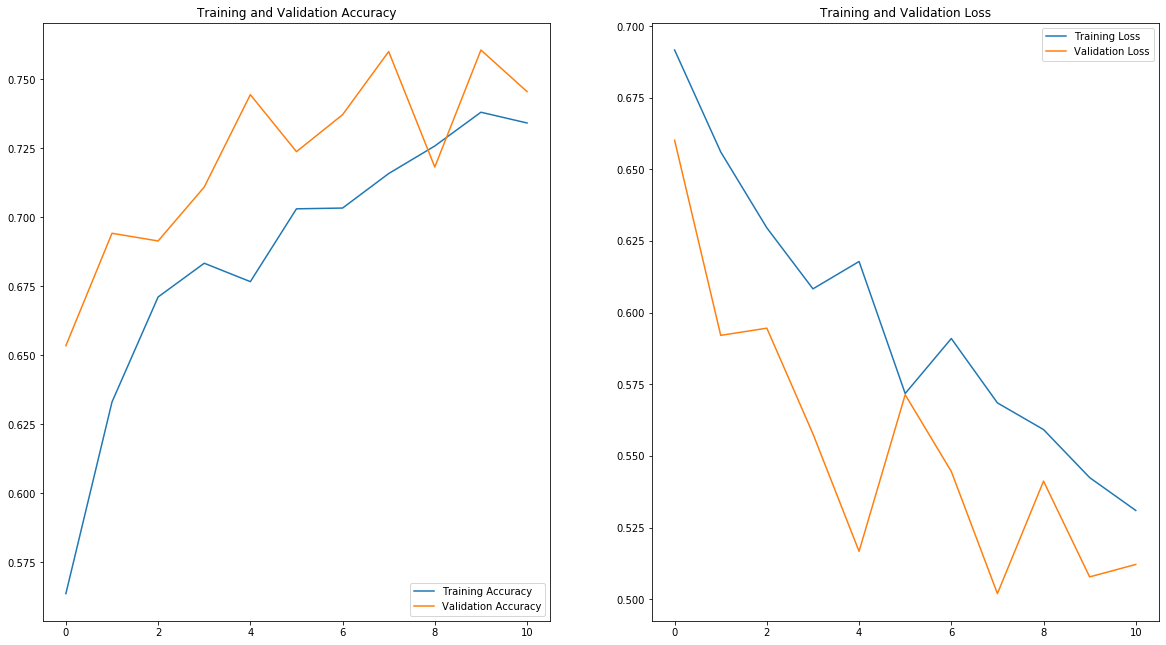

In [16]:
#mymodel outcome
epochs=11

acc = mymodel.history['accuracy']
val_acc = mymodel.history['val_accuracy']

loss = mymodel.history['loss']
val_loss = mymodel.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 11))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

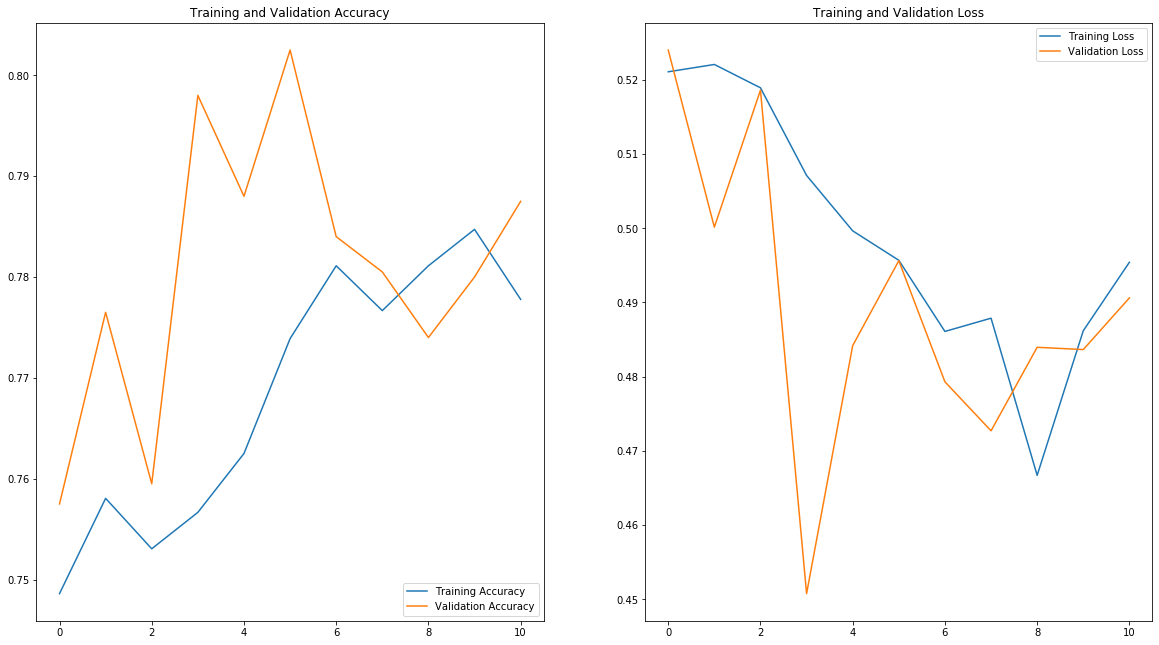

In [20]:
#mymodel outcome
epochs=11

acc = my_model2.history['accuracy']
val_acc = my_model2.history['val_accuracy']

loss = my_model2.history['loss']
val_loss = my_model2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 11))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [22]:
predict = mymodel.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

AttributeError: 'History' object has no attribute 'predict'